In [1]:
import numpy as np
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

In [2]:
IMAGE_SHAPE = (224, 224)

In [3]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
training_data='workspace/MangoFruitDDS/train'
training_image_data  = image_generator.flow_from_directory(training_data,target_size=IMAGE_SHAPE)


Found 500 images belonging to 5 classes.


In [4]:
training_image_data[1][1].shape

(32, 5)

In [5]:
validation_data='workspace/MangoFruitDDS/val'
validation_image_data  = image_generator.flow_from_directory(validation_data,target_size=IMAGE_SHAPE)


Found 125 images belonging to 5 classes.


In [6]:
class_names = sorted(training_image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names


array(['Alternaria', 'Anthracnose', 'Black-Mould-Rot', 'Healthy',
       'Stem-End-Rot'], dtype='<U15')

In [7]:
MobileNetV2=tf.keras.applications.mobilenet_v2.MobileNetV2
model_arch=MobileNetV2()
model_arch.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [8]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [9]:
feature_extractor = hub.KerasLayer(feature_extractor_model, input_shape=(224, 224, 3), trainable=False) 

In [10]:
model = tf.keras.Sequential([feature_extractor])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
Total params: 2257984 (8.61 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [11]:
for image_batch, label_batch in training_image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 5)


In [12]:
model_mango = tf.keras.Sequential([feature_extractor ])
model_mango.add(tf.keras.layers.Dense(5))
model_mango.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [13]:
model_mango.compile(optimizer='Adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['acc'])


In [14]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []

  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])
    self.model.reset_metrics()

batch_stats_callback = CollectBatchStats()

In [15]:
history = model_mango.fit(training_image_data,
                          epochs = 20,
                          validation_data=validation_image_data,
                          callbacks=[batch_stats_callback])

Epoch 1/20
16/16 [==============================] - 9s 442ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 1.0678 - val_acc: 0.5760
Epoch 2/20
16/16 [==============================] - 7s 416ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.7871 - val_acc: 0.7200
Epoch 3/20
16/16 [==============================] - 7s 445ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.6645 - val_acc: 0.7680
Epoch 4/20
16/16 [==============================] - 7s 419ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.6025 - val_acc: 0.7920
Epoch 5/20
16/16 [==============================] - 7s 416ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.5704 - val_acc: 0.8080
Epoch 6/20
16/16 [==============================] - 7s 417ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.5348 - val_acc: 0.8320
Epoch 7/20
16/16 [==============================] - 7s 421ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.5224 - val_acc: 0.8480
Epoch 8/20
16/16 [==

In [16]:
arr = model_mango.predict(image_batch)
predicted_id = np.argmax(arr, axis=-1)
predicted_label_batch = class_names[predicted_id]
label_id = np.argmax(label_batch, axis=-1)
true_label_batch = class_names[label_id]

1/1 [==============================] - 1s 596ms/step


In [17]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_data = 'workspace/MangoFruitDDS/train'
test_image_data = image_generator.flow_from_directory(test_data,target_size=IMAGE_SHAPE,batch_size=32)

Found 500 images belonging to 5 classes.


In [18]:
for image_batch, label_batch in test_image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 5)


In [19]:
predicted_batch = model_mango.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
label_id = np.argmax(label_batch, axis=-1)

1/1 [==============================] - 0s 339ms/step


In [20]:
from sklearn.metrics import classification_report
print(classification_report(label_id, predicted_id, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



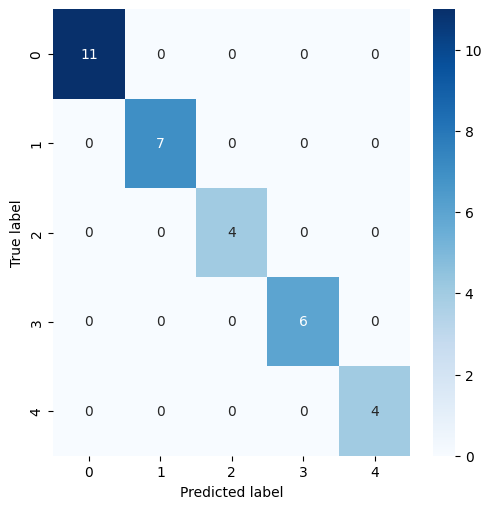

In [21]:
import seaborn as sns

con_mat_df=tf.math.confusion_matrix(labels = label_id , predictions = predicted_id)

figure = plt.figure(figsize=(5, 5))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

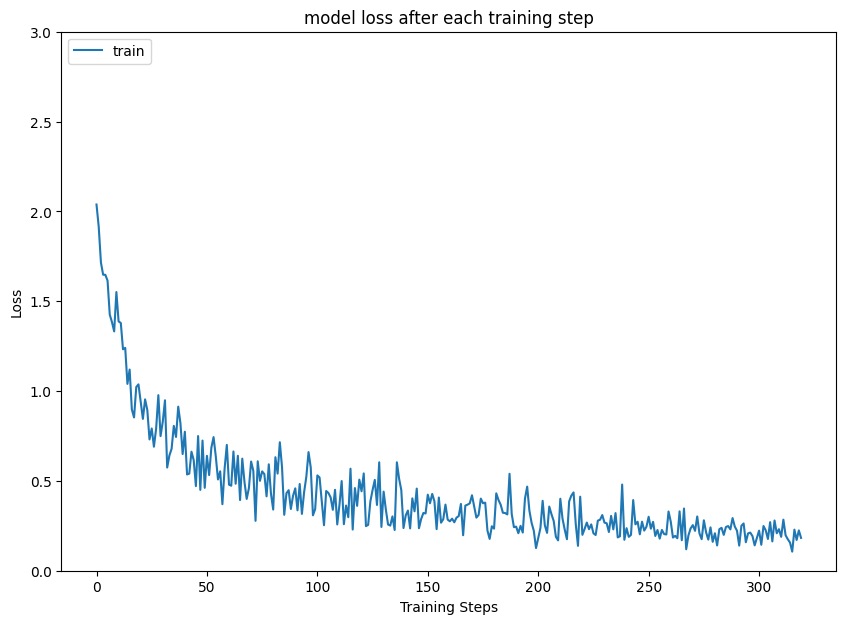

In [22]:
plt.figure(figsize=(10,7))
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,3])
plt.plot(batch_stats_callback.batch_losses)
plt.title('model loss after each training step')
plt.legend(['train'], loc='upper left')

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


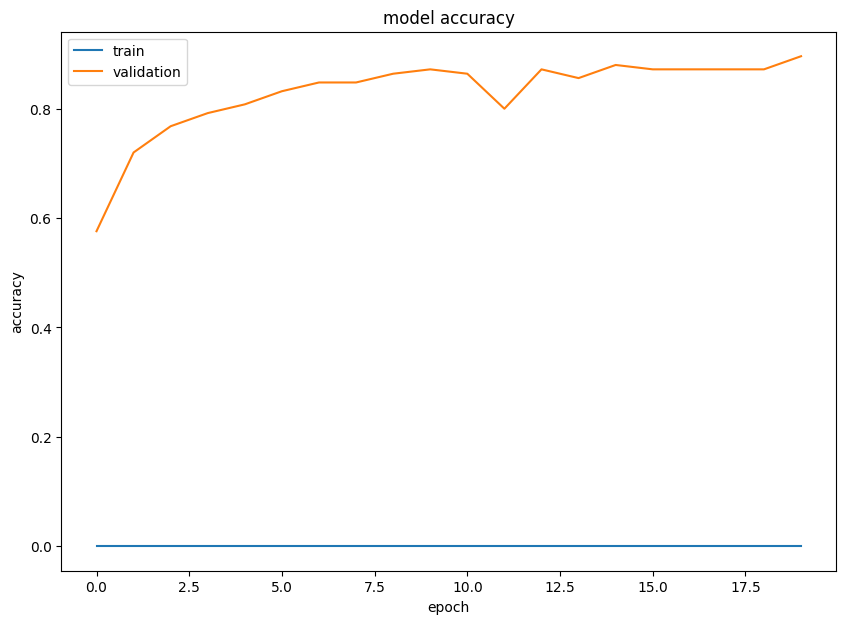

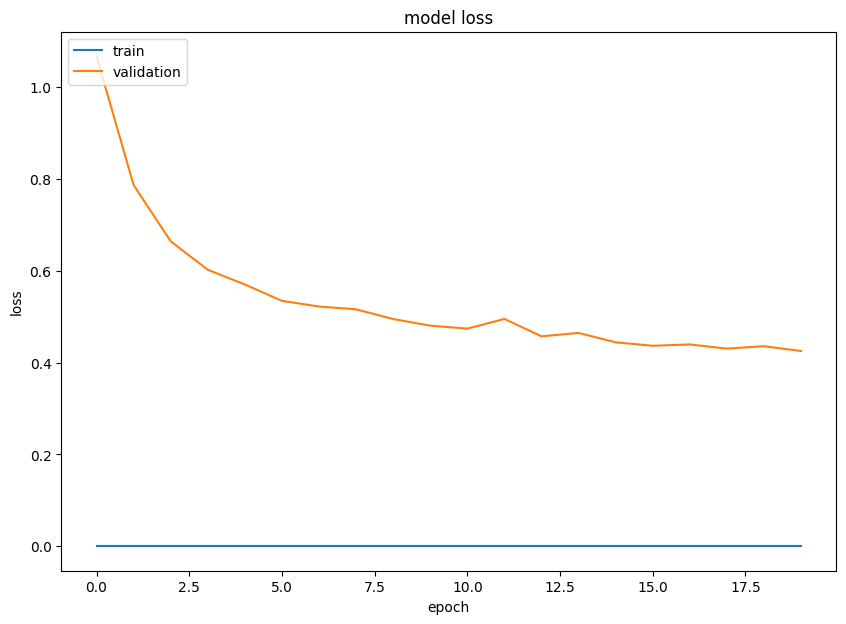

In [23]:
print(history.history.keys())

# summarize history for accuracy
plt.figure(figsize=(10,7))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# summarize history for loss
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

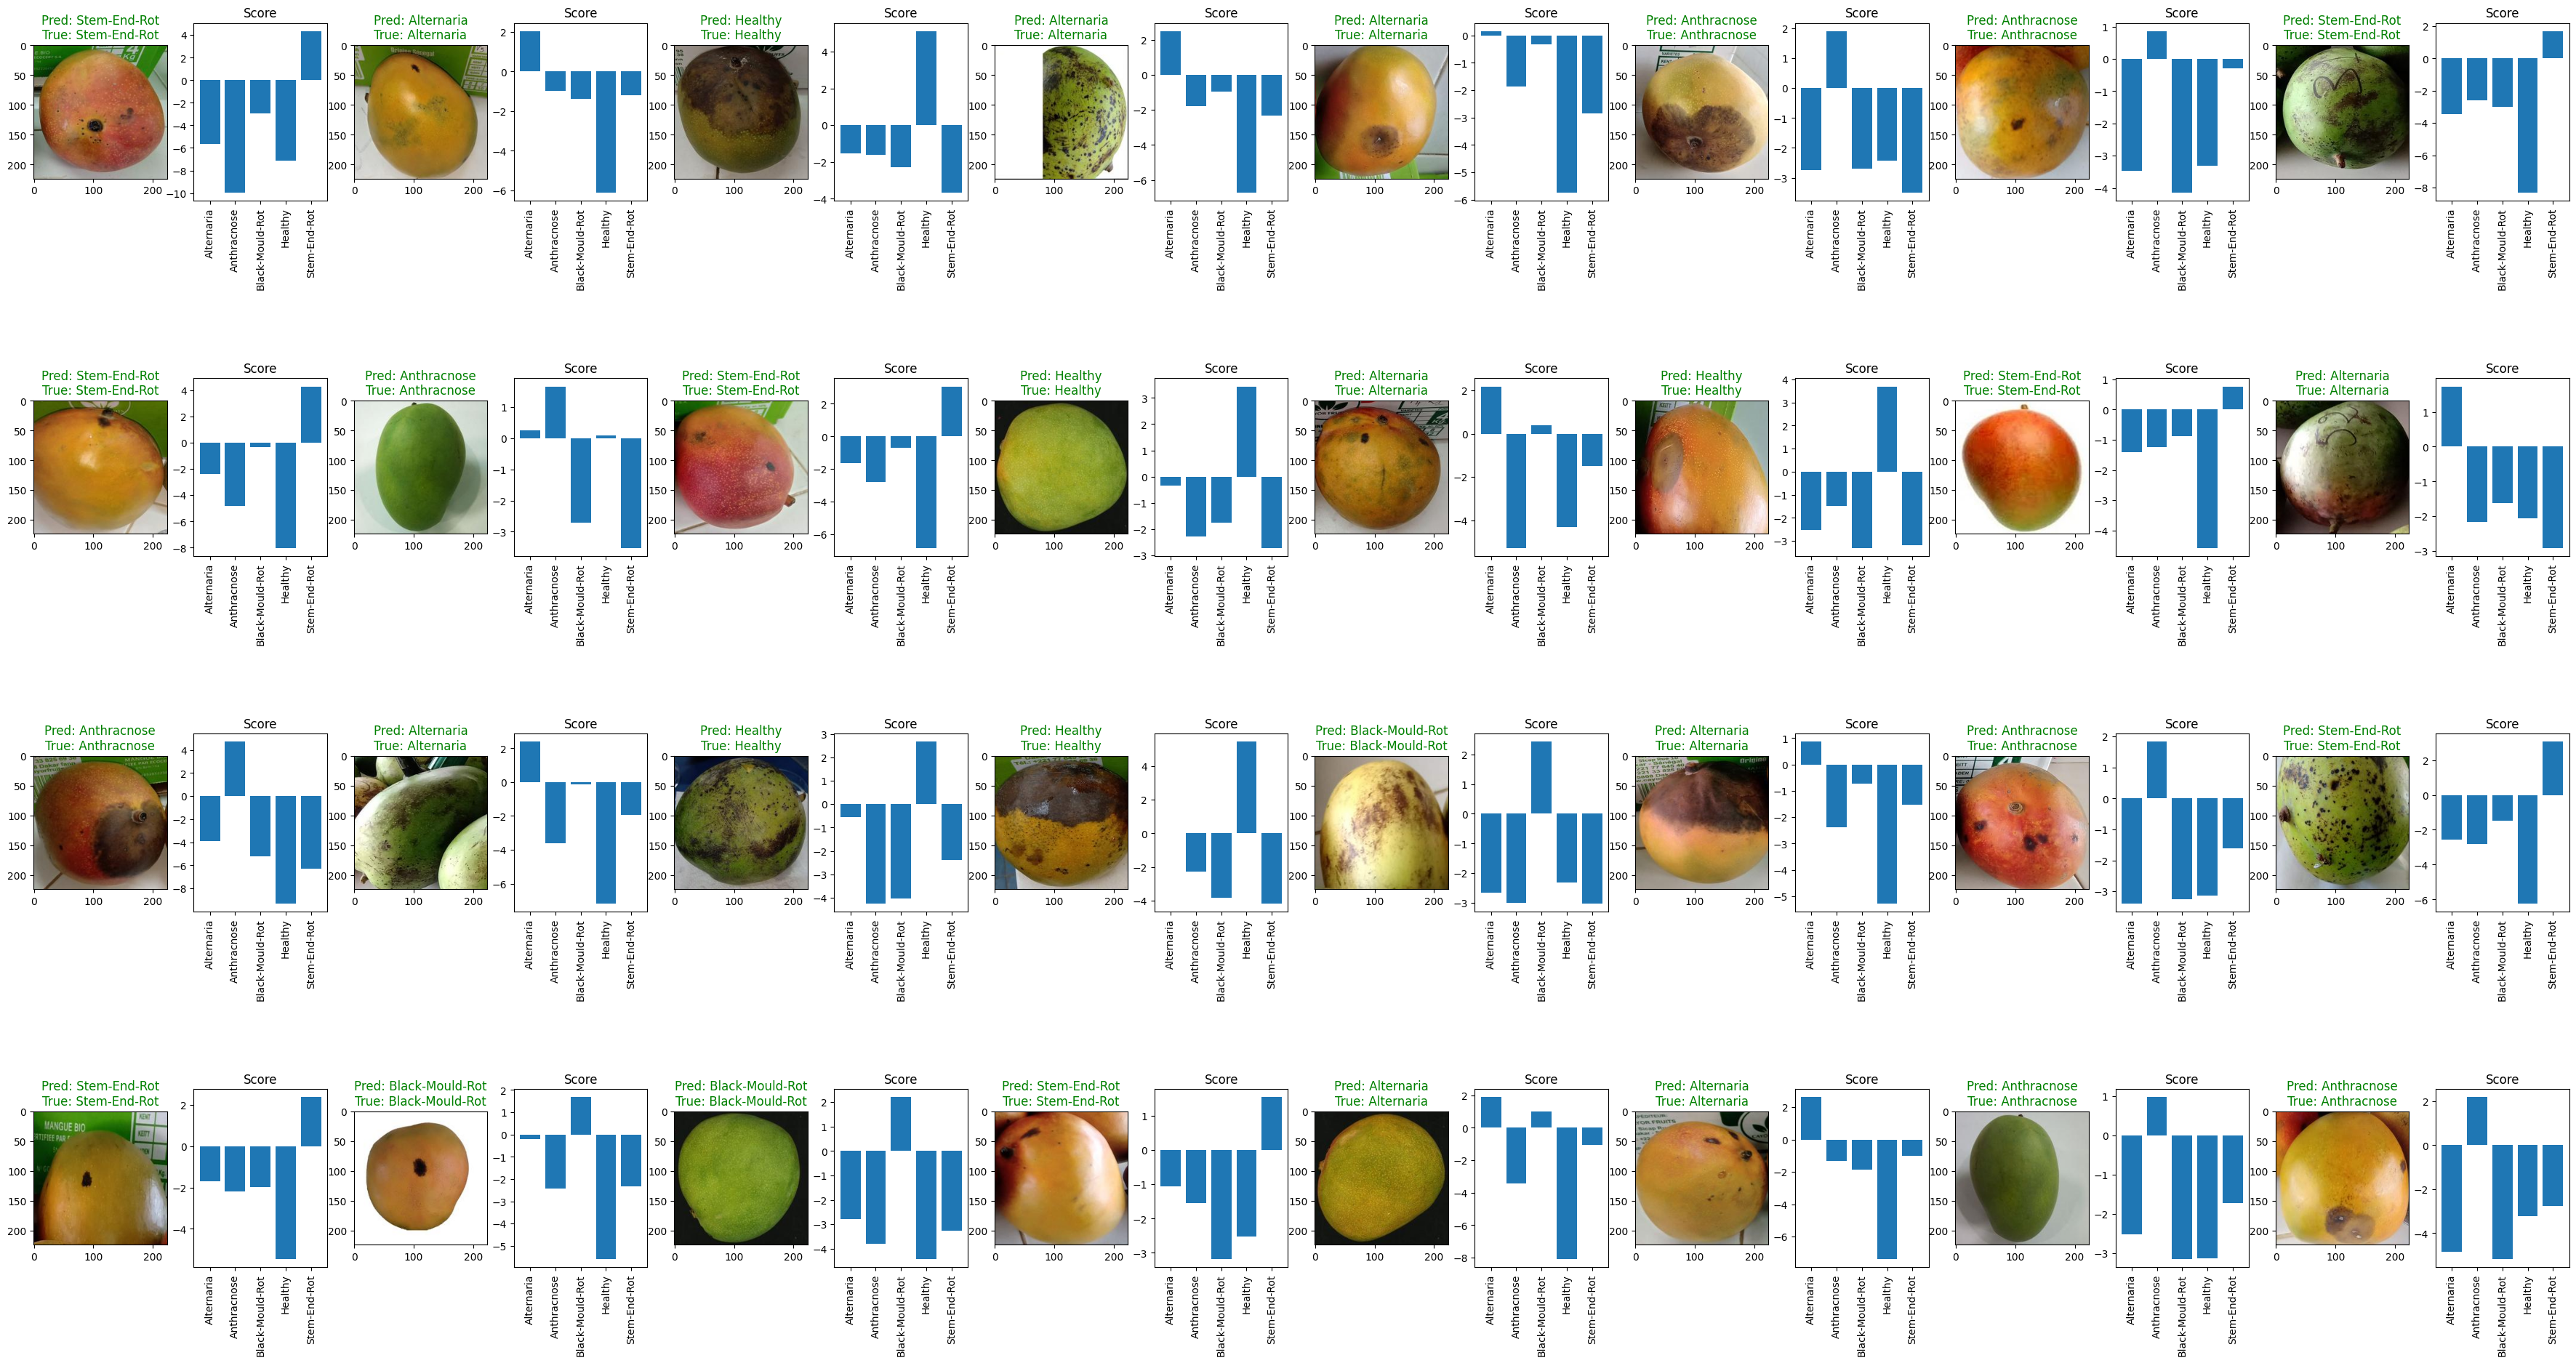

In [24]:
img_counter=0
prob_counter=0

plt.figure(figsize=(45,200))
plt.subplots_adjust(hspace=1)
for n in range(64):
  
  plt.subplot(32,16,n+1)
  if(n%2==0):
      plt.imshow(image_batch[img_counter])
      color = "green" if predicted_id[img_counter] == label_id[img_counter] else "red"
      plt.title("Pred: "+predicted_label_batch[img_counter].title()+"\nTrue: "+true_label_batch[img_counter], color=color)
      img_counter=img_counter+1

  if(n%2==1):
      plt.title("Score", color="Black")

      data=[arr[prob_counter][0],arr[prob_counter][1],arr[prob_counter][2],
            arr[prob_counter][3], arr[prob_counter][4]
            ]
    
      plt.bar(class_names,data)
      plt.xticks(rotation='vertical')
      
      prob_counter=prob_counter+1     